In [125]:
%%pyspark
df = spark.read.load('abfss://files@datalakefv41bzh.dfs.core.windows.net/data/MAC_UE.csv', format='csv'
## If header exists uncomment line below
, header=True
)
display(df.limit(10))

StatementMeta(sparkfv41bzh, 1, 121, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, de43a64e-8291-4102-b752-a9aecad11b57)

In [126]:
df.printSchema()


StatementMeta(sparkfv41bzh, 1, 122, Finished, Available, Finished)

root
 |-- tstamp: string (nullable = true)
 |-- ngran_node: string (nullable = true)
 |-- mcc: string (nullable = true)
 |-- mnc: string (nullable = true)
 |-- mnc_digit_len: string (nullable = true)
 |-- nb_id: string (nullable = true)
 |-- cu_du_id: string (nullable = true)
 |-- frame: string (nullable = true)
 |-- slot: string (nullable = true)
 |-- dl_aggr_tbs: string (nullable = true)
 |-- ul_aggr_tbs: string (nullable = true)
 |-- dl_aggr_bytes_sdus: string (nullable = true)
 |-- ul_aggr_bytes_sdus: string (nullable = true)
 |-- dl_curr_tbs: string (nullable = true)
 |-- ul_curr_tbs: string (nullable = true)
 |-- dl_sched_rb: string (nullable = true)
 |-- ul_sched_rb: string (nullable = true)
 |-- pusch_snr: string (nullable = true)
 |-- pucch_snr: string (nullable = true)
 |-- rnti: string (nullable = true)
 |-- dl_aggr_prb: string (nullable = true)
 |-- ul_aggr_prb: string (nullable = true)
 |-- dl_aggr_sdus: string (nullable = true)
 |-- ul_aggr_sdus: string (nullable = true)


In [127]:
df.count()


StatementMeta(sparkfv41bzh, 1, 123, Finished, Available, Finished)

20321

In [128]:
df.schema

StatementMeta(sparkfv41bzh, 1, 124, Finished, Available, Finished)

StructType([StructField('tstamp', StringType(), True), StructField('ngran_node', StringType(), True), StructField('mcc', StringType(), True), StructField('mnc', StringType(), True), StructField('mnc_digit_len', StringType(), True), StructField('nb_id', StringType(), True), StructField('cu_du_id', StringType(), True), StructField('frame', StringType(), True), StructField('slot', StringType(), True), StructField('dl_aggr_tbs', StringType(), True), StructField('ul_aggr_tbs', StringType(), True), StructField('dl_aggr_bytes_sdus', StringType(), True), StructField('ul_aggr_bytes_sdus', StringType(), True), StructField('dl_curr_tbs', StringType(), True), StructField('ul_curr_tbs', StringType(), True), StructField('dl_sched_rb', StringType(), True), StructField('ul_sched_rb', StringType(), True), StructField('pusch_snr', StringType(), True), StructField('pucch_snr', StringType(), True), StructField('rnti', StringType(), True), StructField('dl_aggr_prb', StringType(), True), StructField('ul_agg

In [130]:
# df.describe().show()

StatementMeta(sparkfv41bzh, 1, 126, Finished, Available, Finished)

In [141]:
# Convert relevant columns to numeric if they are not already
from pyspark.sql.functions import col

# Select columns and cast to numeric
df_numeric = df.select(
    col("ngran_node").cast("double").alias("ngran_node"),
    col("dl_aggr_tbs").cast("double").alias("dl_aggr_tbs"),
    col("ul_aggr_tbs").cast("double").alias("ul_aggr_tbs"),
    col("dl_aggr_bytes_sdus").cast("double").alias("dl_aggr_bytes_sdus"),
    col("ul_aggr_bytes_sdus").cast("double").alias("ul_aggr_bytes_sdus"),
    col("pusch_snr").cast("double").alias("pusch_snr"),
    col("pucch_snr").cast("double").alias("pucch_snr"),
    col("rnti").cast("double").alias("rnti"),
    col("dl_bler").cast("double").alias("dl_bler"),
    col("ul_bler").cast("double").alias("ul_bler")
)

# Show summary statistics
df_numeric.describe().show()


StatementMeta(sparkfv41bzh, 1, 137, Finished, Available, Finished)

+-------+----------+------------------+------------------+------------------+------------------+---------+---------+------------------+-------+-------+
|summary|ngran_node|       dl_aggr_tbs|       ul_aggr_tbs|dl_aggr_bytes_sdus|ul_aggr_bytes_sdus|pusch_snr|pucch_snr|              rnti|dl_bler|ul_bler|
+-------+----------+------------------+------------------+------------------+------------------+---------+---------+------------------+-------+-------+
|  count|     20321|             20321|             20321|             20321|             20321|    20321|    20321|             20321|  20321|  20321|
|   mean|       2.0|393.62098321932973| 488.4878696914522|447.35943113035773| 373.8358840608238|     64.0|     64.0| 591.7626593179469|    0.0|    0.0|
| stddev|       0.0| 252.0860180039131|262.36217297106015|314.37927802031334|281.05059034685974|      0.0|      0.0|292.83767424963526|    0.0|    0.0|
|    min|       2.0|              28.0|              18.0|              39.0|           

StatementMeta(sparkfv41bzh, 1, 138, Finished, Available, Finished)

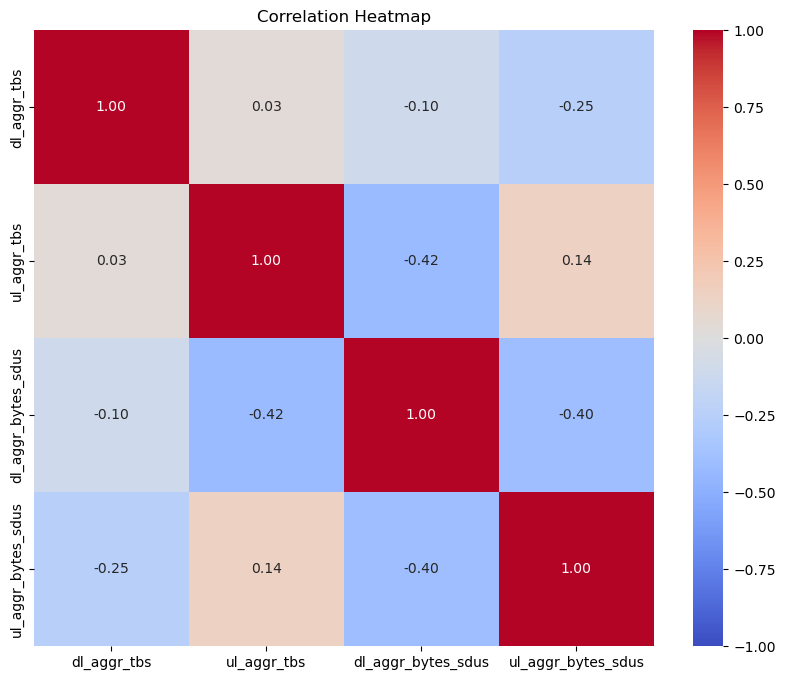

In [142]:
# Compute the correlation matrix for selected columns
numerical_columns = ['dl_aggr_tbs', 'ul_aggr_tbs', 'dl_aggr_bytes_sdus', 'ul_aggr_bytes_sdus']
df_corr = df_numeric.select(*numerical_columns)

# Compute correlation matrix using the Pandas API
df_pandas = df_corr.toPandas()
correlation_matrix = df_pandas.corr()

# Visualize the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [143]:
# Calculate average transport block size per node (average downlink and uplink transport block sizes)
df_avg_tbs = df_numeric.groupBy("ngran_node").avg("dl_aggr_tbs", "ul_aggr_tbs")
df_avg_tbs.show()


StatementMeta(sparkfv41bzh, 1, 139, Finished, Available, Finished)

+----------+------------------+-----------------+
|ngran_node|  avg(dl_aggr_tbs)| avg(ul_aggr_tbs)|
+----------+------------------+-----------------+
|       2.0|393.62098321932973|488.4878696914522|
+----------+------------------+-----------------+



In [144]:
# Aggregate bytes per node for downlink and uplink (TRAFFIC VOLUME ANALYSIS)
df_traffic_volume = df_numeric.groupBy("ngran_node").agg(
    {"dl_aggr_bytes_sdus": "sum", "ul_aggr_bytes_sdus": "sum"}
)

df_traffic_volume.show()


StatementMeta(sparkfv41bzh, 1, 140, Finished, Available, Finished)

+----------+-----------------------+-----------------------+
|ngran_node|sum(ul_aggr_bytes_sdus)|sum(dl_aggr_bytes_sdus)|
+----------+-----------------------+-----------------------+
|       2.0|              7596719.0|              9090791.0|
+----------+-----------------------+-----------------------+



In [145]:
# Distribution of PUSCH and PUCCH SNR
df_snr_dist = df_numeric.select("pusch_snr", "pucch_snr")

df_snr_dist.describe().show()


StatementMeta(sparkfv41bzh, 1, 141, Finished, Available, Finished)

+-------+---------+---------+
|summary|pusch_snr|pucch_snr|
+-------+---------+---------+
|  count|    20321|    20321|
|   mean|     64.0|     64.0|
| stddev|      0.0|      0.0|
|    min|     64.0|     64.0|
|    max|     64.0|     64.0|
+-------+---------+---------+



StatementMeta(sparkfv41bzh, 1, -1, Finished, Available, Finished)